# **Visualizing Time Series Retail Sales Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [ ]:
data=pd.read_csv('/content/Sales_Dataset[1].csv')

In [ ]:
data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [ ]:
# Step 4: Basic exploration
print("Shape of data:", data.shape)
print("\nColumns:\n", data.columns)
print("\nSample records:\n", data.head())



Shape of data: (1194, 12)

Columns:
 Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

Sample records:
   Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   
3  B-26776    4975    1330        14  Electronics          Printers   
4  B-26776    4975    1330        14  Electronics          Printers   

  PaymentMode  Order Date   CustomerName     State     City Year-Month  
0         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
1         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  
2         UPI  2021-07-25   Robert Stone  New York  Buffalo    2021-07  
3         UPI  2023-06-27  David P

In [ ]:
# Step 5: Check for missing values & data types
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)


Missing values:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

Data types:
 Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Order Date      object
CustomerName    object
State           object
City            object
Year-Month      object
dtype: object


In [ ]:
# Step 6: Convert date column to datetime
#  Adjust column name below if different
date_col = 'Order Date'   # change this based on your dataset
data[date_col] = pd.to_datetime(data[date_col])

In [ ]:
# Step 7: Sort by date
df = data.sort_values(by=date_col)

In [ ]:
# Step 8: Extract date-related features (useful for EDA)
df['Year'] = df[date_col].dt.year
df['Month'] = df[date_col].dt.month
df['Weekday'] = df[date_col].dt.day_name()

In [ ]:
# Step 9: Check numerical columns (sales, profit, quantity)
print("\nNumeric columns summary:\n", df.describe())


Numeric columns summary:
             Amount       Profit     Quantity                     Order Date  \
count  1194.000000  1194.000000  1194.000000                           1194   
mean   5178.089615  1348.992462    10.674204  2022-10-03 21:49:44.924623104   
min     508.000000    50.000000     1.000000            2020-03-22 00:00:00   
25%    2799.000000   410.000000     6.000000            2021-09-06 00:00:00   
50%    5152.000000  1014.000000    11.000000            2022-10-07 00:00:00   
75%    7626.000000  2035.000000    16.000000            2023-12-12 00:00:00   
max    9992.000000  4930.000000    20.000000            2025-03-15 00:00:00   
std    2804.921955  1117.992573     5.777102                            NaN   

              Year       Month  
count  1194.000000  1194.00000  
mean   2022.240369     6.71273  
min    2020.000000     1.00000  
25%    2021.000000     4.00000  
50%    2022.000000     7.00000  
75%    2023.000000    10.00000  
max    2025.000000    12.00000

TIME SERIES VISUALIZATIONS


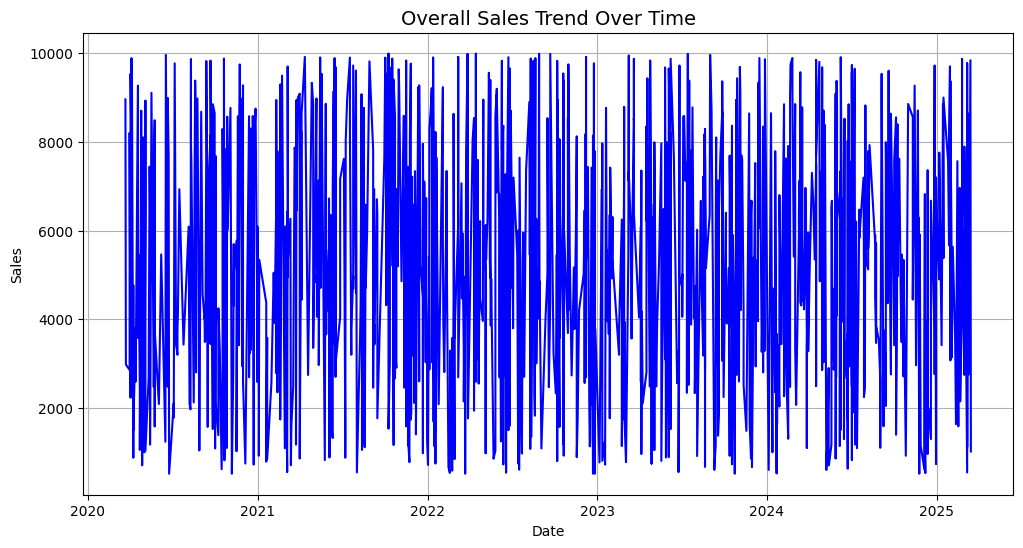

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df[date_col], df['Amount'], color='blue')
plt.title('Overall Sales Trend Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
# Monthly sales trend
monthly_sales = df.groupby(['Year','Month'])['Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(DAY=1))

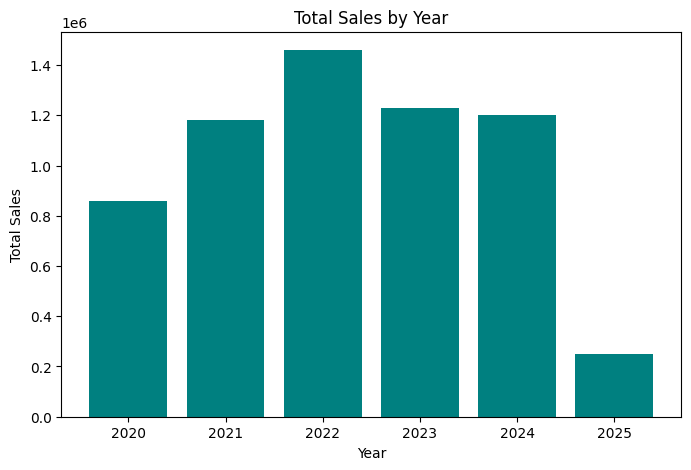

In [ ]:
#  Yearly sales comparison
yearly_sales = df.groupby('Year')['Amount'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(yearly_sales['Year'], yearly_sales['Amount'], color='teal')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

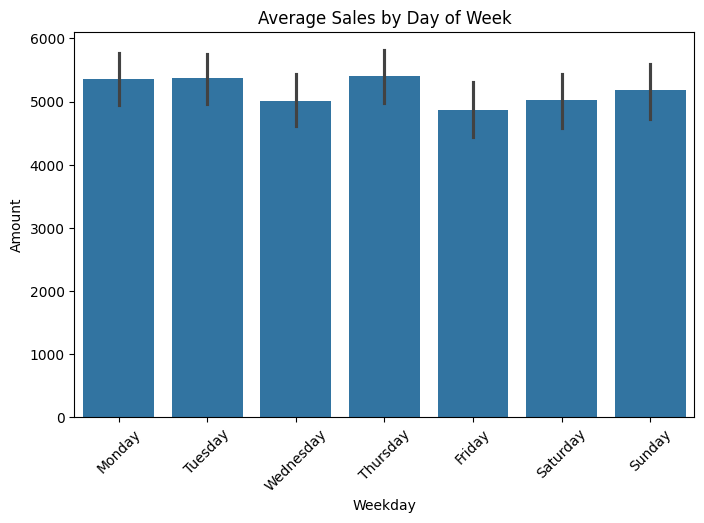

In [ ]:
#Average sales by day of week
plt.figure(figsize=(8,5))
sns.barplot(x='Weekday', y='Amount', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Sales by Day of Week')
plt.xticks(rotation=45)
plt.show()

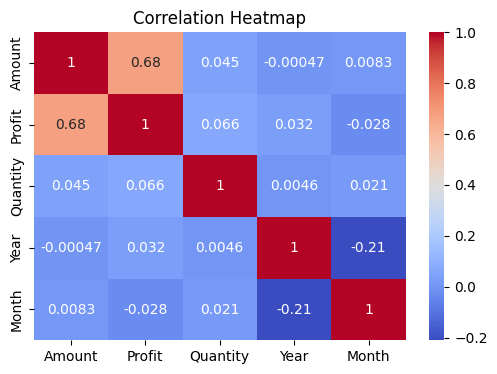

In [ ]:
# Correlation heatmap (Sales vs numeric variables)
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Seasonality and Moving Averages


In [ ]:
# Daily aggregated sales
daily_sales = df.groupby(date_col)['Amount'].sum().reset_index()

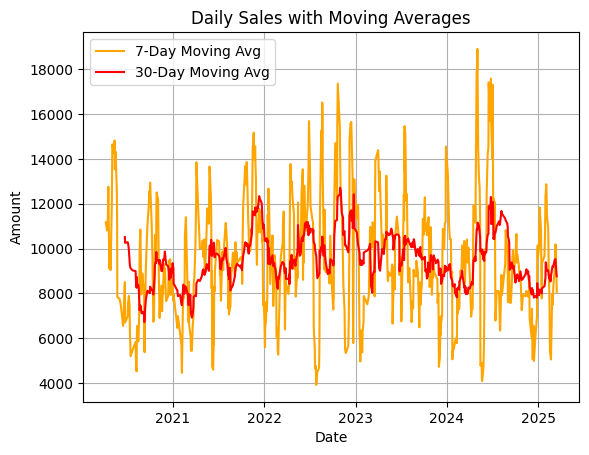

In [ ]:
# Moving averages
daily_sales['7D_MA'] = daily_sales['Amount'].rolling(window=7).mean()
daily_sales['30D_MA'] = daily_sales['Amount'].rolling(window=30).mean()

plt.plot(daily_sales[date_col], daily_sales['7D_MA'], label='7-Day Moving Avg', color='orange')
plt.plot(daily_sales[date_col], daily_sales['30D_MA'], label='30-Day Moving Avg', color='red')
plt.title('Daily Sales with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

Decompose time series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Resample to monthly frequency
ts = df.set_index(date_col)['Amount'].resample('M').sum()
result = seasonal_decompose(ts, model='additive')

/tmp/ipython-input-284301204.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.set_index(date_col)['Amount'].resample('M').sum()


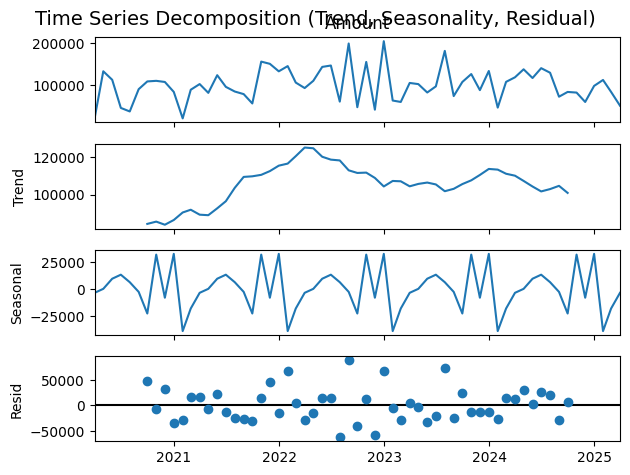

In [ ]:
# Plot decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Trend, Seasonality, Residual)', fontsize=14)
plt.show()

In [ ]:
print("\n🔹 EDA Insights Summary:")
print("- Sales trend visualization shows how revenue evolves over time.")
print("- Monthly aggregation reveals seasonal peaks (e.g., holiday months).")
print("- Weekly analysis shows which weekdays have the highest sales.")
print("- Correlation heatmap shows relationships between numeric variables (e.g., Profit, Quantity, Discount, Sales).")
print("- Moving averages smooth out short-term fluctuations, showing long-term trends.")
print("- Decomposition separates trend and seasonality for forecasting insights.")



🔹 EDA Insights Summary:
- Sales trend visualization shows how revenue evolves over time.
- Monthly aggregation reveals seasonal peaks (e.g., holiday months).
- Weekly analysis shows which weekdays have the highest sales.
- Correlation heatmap shows relationships between numeric variables (e.g., Profit, Quantity, Discount, Sales).
- Moving averages smooth out short-term fluctuations, showing long-term trends.
- Decomposition separates trend and seasonality for forecasting insights.
